## Medical Insurance Cost Prediction using Machine Learning with Python

* Data Collection about insurance
* Data Analysis
* Train Test Split
* Linear regression model
* Trained Model
* New Data(Predictive system)



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Data Collection and Processing

In [2]:
#Load the Medical information data
data=pd.read_csv('/content/insurance.csv')

#Check the first five rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Check the shape of the dataset
data.shape

(1338, 7)

In [4]:
#Get the infor about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* *Categorical are*

* Smoker
* region
* Sex

In [5]:
#Chekck the null values of the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Check the statiscal
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Geth the valeu columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# *DATA ANALYSIS*

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

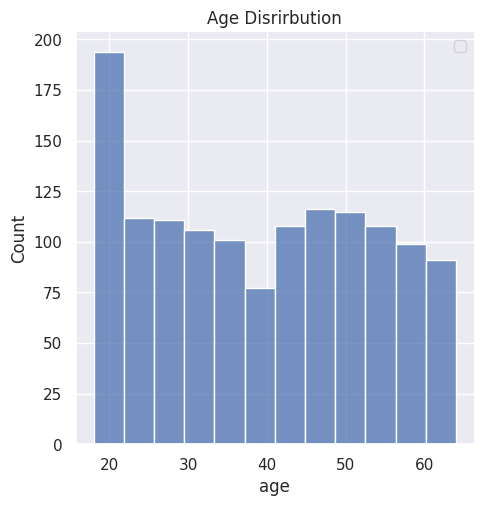

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['age'])
plt.title('Age Disrirbution')
plt.legend()
plt.show()

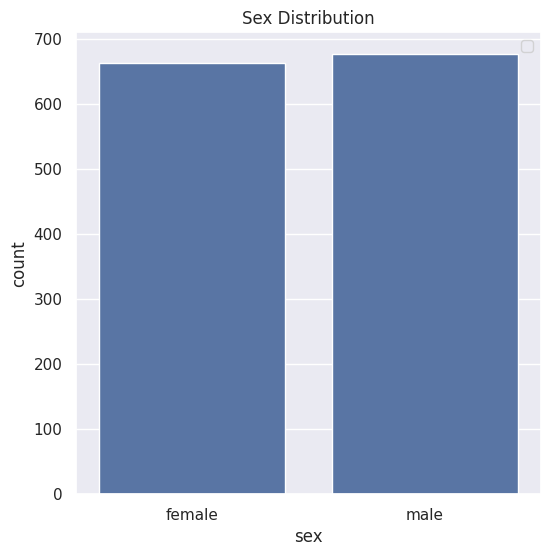

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

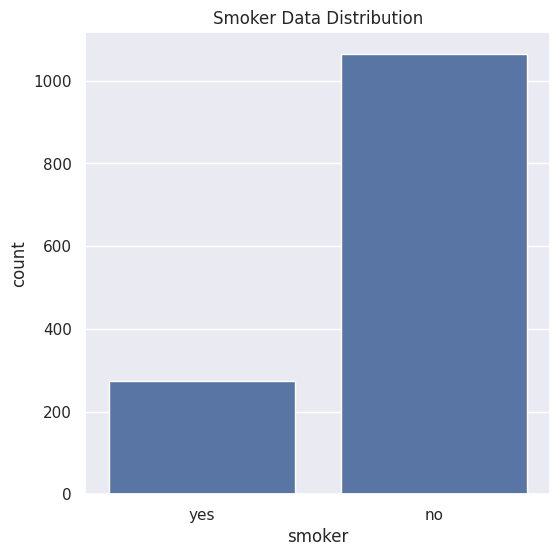

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=data)
plt.title("Smoker Data Distribution")
plt.show

<Figure size 600x600 with 0 Axes>

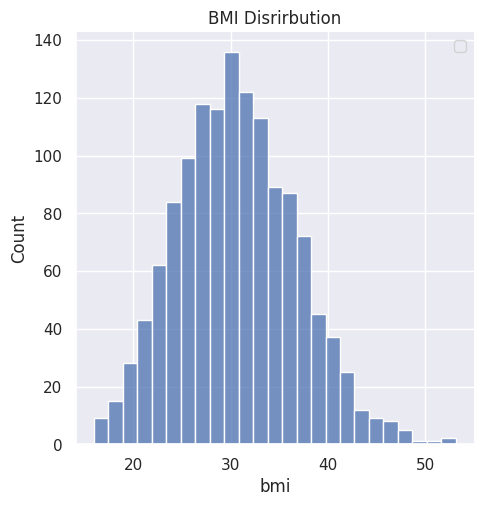

In [12]:
#BMi Data Disbributon
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['bmi'])
plt.title('BMI Disrirbution')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

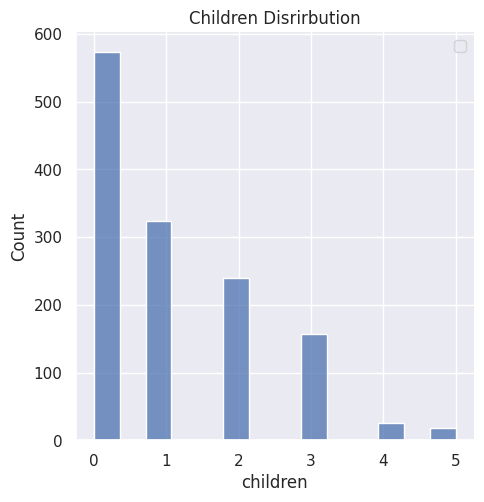

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['children'])
plt.title('Children Disrirbution')
plt.legend()
plt.show()

In [14]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [15]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## %Data  Encoding%

In [17]:
from sklearn.preprocessing import LabelEncoder
data = data.copy()

# Label encoding for 'object' columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])


In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## *Features and Target*

In [19]:
X=data.drop(columns='charges',axis=1)
Y=data['charges']

## *Split in Trainig and Testing Data*

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [24]:
model.fit(X_train,Y_train)

LinearRegression()

In [26]:
train_test=model.predict(X_train)
acc=metrics.r2_score(train_test,Y_train)
print("The Accuracy of train data is",acc)

The Accuracy of train data is 0.6701992676115631


In [27]:
data_test=model.predict(X_test)
acc=metrics.r2_score(data_test,Y_test)
print("The Accuracy of train data is",acc)

The Accuracy of train data is 0.6621668246589305
